# Tema:  Dinâmica 'Meu Dia em Etapas'

Questões aplicadas aos alunos:

**1. O que é algoritmo no contexto  da Ciência da Computação?**

A) Um conjunto de imagens sequenciais                 
B) Uma linguagem de programação                        
C) Uma sequência finita e ordenada de instruções para resolução de um problema     
D) Um código executável por máquinas

**2. Qual a principal finalidade de um fluxograma em algoritmos?**     
 A) Criar animações digitais  
 B) Representar graficamente a lógica de um processo                  
 C) Ilustrar dados estatísticos                 
 D) Modelar redes neurais

 **3. Por que a decomposição de tarefas em etapas é útil na construção de algoritmos?**       
 A) Porque permite reduzir o tempo de codificação     
 B) Porque facilita a execução automática do algoritmo       
 C) Porque melhora a legibilidade e compreensão do problema    
 D) Porque elimina erros lógicos




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
#importando planilhas com respostas
df= pd.read_csv('sample_data/posteste_aula2.csv')
df.head()

,Carimbo de data/hora,1. O que é um algoritmo no contexto da Ciência da Computação?,2. Qual a principal finalidade de um fluxograma em algoritmos?,3. Por que a decomposição de tarefas em etapas é útil na construção de algoritmos?
0,16/07/2025 15:37:47,c) Uma sequência finita e ordenada de instruçõ...,b) Representar graficamente a lógica de um pro...,b) Porque facilita a execução automática do al...
1,16/07/2025 15:39:11,c) Uma sequência finita e ordenada de instruçõ...,b) Representar graficamente a lógica de um pro...,c) Porque melhora a legibilidade e compreensão...
2,16/07/2025 15:40:42,d) Um código executável por máquinas,b) Representar graficamente a lógica de um pro...,c) Porque melhora a legibilidade e compreensão...
3,16/07/2025 15:40:47,b) Uma linguagem de programação,b) Representar graficamente a lógica de um pro...,b) Porque facilita a execução automática do al...
4,16/07/2025 15:41:12,c) Uma sequência finita e ordenada de instruçõ...,b) Representar graficamente a lógica de um pro...,b) Porque facilita a execução automática do al...


In [6]:
#renomea colunas
df.columns = ['timestamp','q1','q2','q3']
#remove espaços em branco
for coluna in df.columns[1:]:
  df[coluna].astype(str).str.strip()


df.head()

,timestamp,q1,q2,q3
0,16/07/2025 15:37:47,c) Uma sequência finita e ordenada de instruçõ...,b) Representar graficamente a lógica de um pro...,b) Porque facilita a execução automática do al...
1,16/07/2025 15:39:11,c) Uma sequência finita e ordenada de instruçõ...,b) Representar graficamente a lógica de um pro...,c) Porque melhora a legibilidade e compreensão...
2,16/07/2025 15:40:42,d) Um código executável por máquinas,b) Representar graficamente a lógica de um pro...,c) Porque melhora a legibilidade e compreensão...
3,16/07/2025 15:40:47,b) Uma linguagem de programação,b) Representar graficamente a lógica de um pro...,b) Porque facilita a execução automática do al...
4,16/07/2025 15:41:12,c) Uma sequência finita e ordenada de instruçõ...,b) Representar graficamente a lógica de um pro...,b) Porque facilita a execução automática do al...


In [7]:
#conta quantidade de respostas para cada alternativa
def conta_respostas(df,coluna,numero_questao):
  respostas = df[coluna].value_counts()
  total = len(df[coluna].dropna())
  total_alternativas= {'A':0, 'B': 0, 'C':0, 'D':0}
  porcentagem = {'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.0}
  for resposta, frequencia in respostas.items():
    if pd.notna(resposta) and len(str(resposta))>0:
      alternativa = str(resposta)[0].upper() #extrai apenas primeira letra
      if alternativa in total_alternativas:
        total_alternativas[alternativa]+= frequencia
  #calcula porcentagem de escolha para cada alternativa
  if total> 0:
    for i in total_alternativas:
      porcentagem[i]= (total_alternativas[i]/total)*100

  return total_alternativas, porcentagem, total

In [8]:
#exibe resultados
contagens = {}
totais = {}
for questao, coluna in enumerate(['q1', 'q2', 'q3'], 1):

    total_alt, porcentagem_alt, total = conta_respostas(df, coluna, questao)


    contagens[f'Q{questao}'] = total_alt
    totais[f'Q{questao}'] = total

    print(f"Questão {questao}:")
    print()
    print(f"Total de respostas: {total}")
    print()
    print(f"{'Alternativa':<15} {'Quantidade':<15} {'Porcentagem (%)'}")
    print()

    for alternativa in ['A', 'B', 'C', 'D']:
        qtd = total_alt[alternativa]
        porc = porcentagem_alt[alternativa]

        print(f"{alternativa:<15} {qtd:<15} {porc:>6.1f}%")
    print("-" *80)
    print()

Questão 1:

Total de respostas: 50

Alternativa     Quantidade      Porcentagem (%)

A               2                  4.0%
B               5                 10.0%
C               39                78.0%
D               4                  8.0%
--------------------------------------------------------------------------------

Questão 2:

Total de respostas: 50

Alternativa     Quantidade      Porcentagem (%)

A               0                  0.0%
B               46                92.0%
C               2                  4.0%
D               2                  4.0%
--------------------------------------------------------------------------------

Questão 3:

Total de respostas: 50

Alternativa     Quantidade      Porcentagem (%)

A               1                  2.0%
B               12                24.0%
C               35                70.0%
D               2                  4.0%
--------------------------------------------------------------------------------



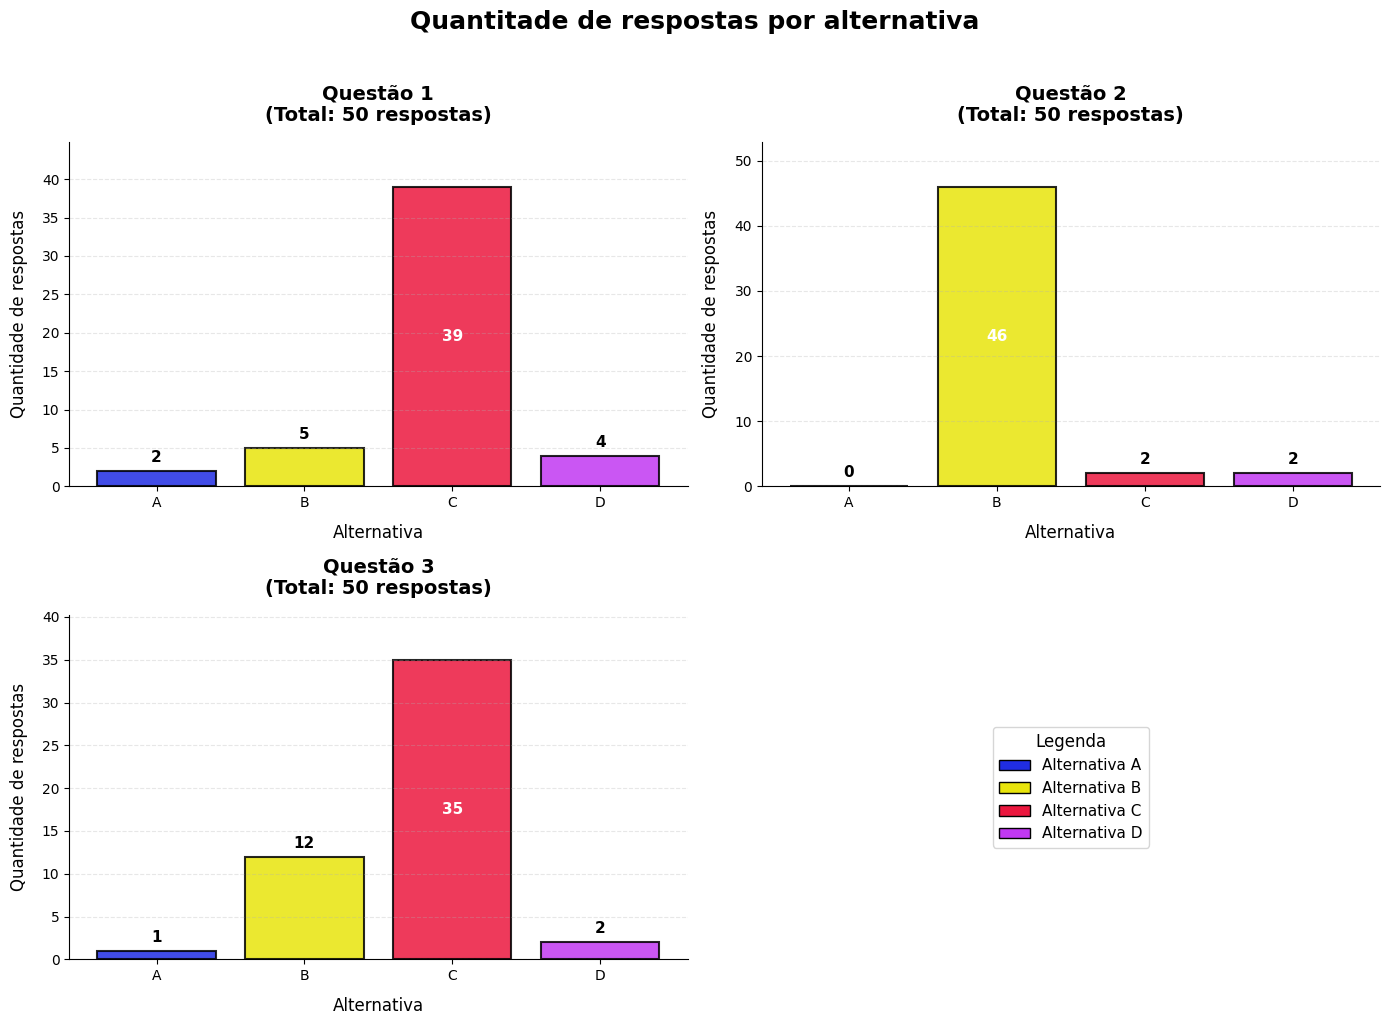

In [9]:
#exibe grafico para cada questao
fig, axes = plt.subplots(2,2,figsize=(14,10))
fig.suptitle('Quantitade de respostas por alternativa', fontsize=18, fontweight = 'bold', y=1.02)
cores = {
    'A': '#202DE3',
    'B': '#E8E40C',
    'C': '#EB173E',
    'D': '#C138F2'
}
#LEGENDA
nomes_alternativas = {
    'A': 'Alternativa A',
    'B': 'Alternativa B',
    'C': 'Alternativa C',
    'D': 'Alternativa D'
}
# Plotar cada questão
questoes = ['Q1', 'Q2', 'Q3']
titulos = ['Questão 1', 'Questão 2', 'Questão 3']

for idx, (questao, titulo) in enumerate(zip(questoes, titulos)):
    ax = axes[idx // 2, idx % 2]

    dados = contagens[questao]
    total_questao = totais[questao]


    alternativas = []
    quantidades = []
    cores_barras = []

    for alt in ['A', 'B', 'C', 'D']:
        #if dados[alt] >= 0:
            alternativas.append(alt)
            quantidades.append(dados[alt])
            cores_barras.append(cores[alt])

    if alternativas:
        # Cria grafico
        bars = ax.bar(alternativas, quantidades, color=cores_barras,
                     edgecolor='black', linewidth=1.5, alpha=0.85)

        # Configurações do gráfico
        ax.set_title(f'{titulo}\n(Total: {total_questao} respostas)',
                    fontsize=14, fontweight='bold', pad=15)
        ax.set_xlabel('Alternativa', fontsize=12, labelpad=10)
        ax.set_ylabel('Quantidade de respostas', fontsize=12, labelpad=10)

        # Definir limite do eixo Y
        max_qtd = max(quantidades)
        ax.set_ylim(0, max_qtd * 1.15)

        # Adicionar grade para facilitar leitura
        ax.grid(axis='y', alpha=0.3, linestyle='--')

        # Adiciona quantidade sobre as barras
        for bar, qtd in zip(bars, quantidades):
            height = bar.get_height()

            if height > max_qtd * 0.8:
                text_color = 'white'
                text_y = height * 0.5
                va = 'center'
            else:
                text_color = 'black'
                text_y = height + max_qtd * 0.02
                va = 'bottom'

            ax.text(bar.get_x() + bar.get_width()/2., text_y,
                   f'{qtd}', ha='center', va=va,
                   color=text_color, fontsize=11, fontweight='bold')




        # Remover bordas desnecessárias
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
    else:
        ax.text(0.5, 0.5, 'Sem dados disponíveis',
               ha='center', va='center', fontsize=12)
        ax.set_title(titulo, fontweight='bold')
        ax.axis('off')


axes[1, 1].axis('off')


from matplotlib.patches import Patch

# Cria elementos de legenda
legend_elements = [Patch(facecolor=cores[alt], edgecolor='black',
                        label=nomes_alternativas[alt])
                  for alt in ['A', 'B', 'C', 'D']]

# Adiciona legenda para as cores
axes[1, 1].legend(handles=legend_elements, loc='center',
                 fontsize=11, title='Legenda',
                 title_fontsize=12)
axes[1, 1].axis('on')
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])
for spine in axes[1, 1].spines.values():
    spine.set_visible(False)

plt.tight_layout()